In [5]:
from PIL import Image
import numpy as np

# Read an image to np.array
image = Image.open("Flatten_squirrel.png")
A = np.asarray(image)

# Convert an original image to grayscale image
gray_img = image.convert('L')
gray_img.save('tmp.png')

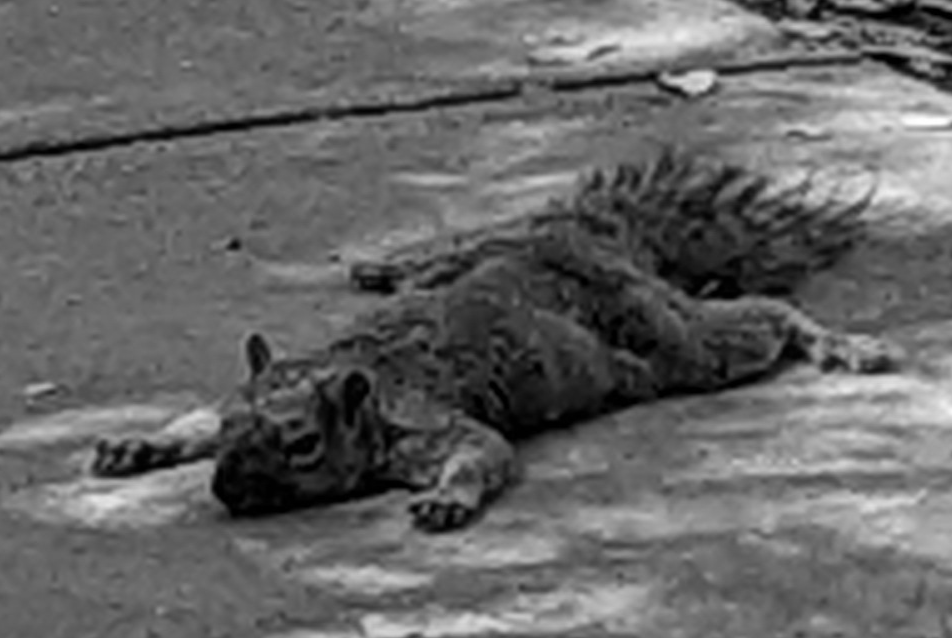

In [2]:
display(image)

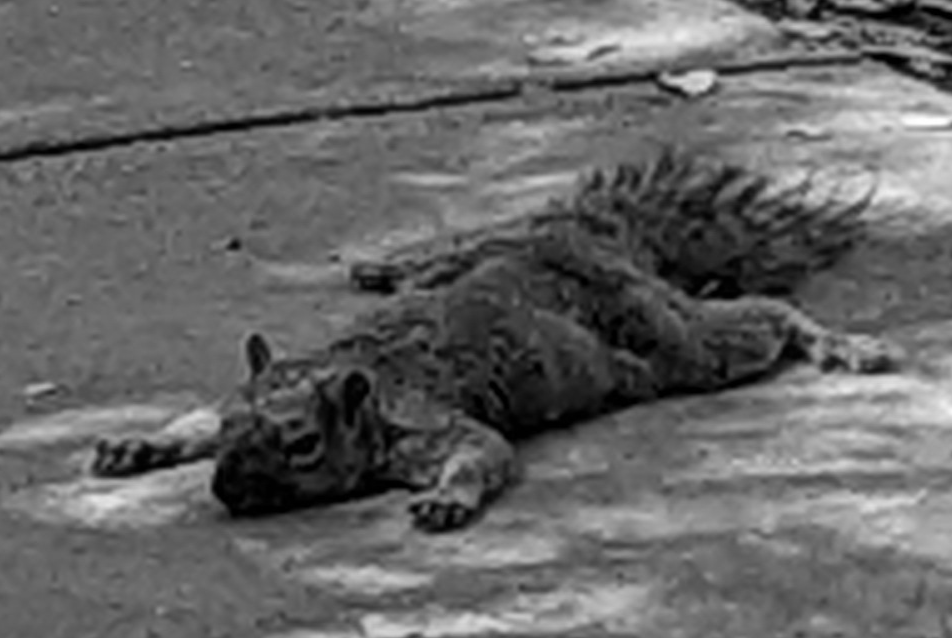

In [4]:
# Display and save the new image
A_new = A
A_new = A_new.astype(np.uint8)
image_new = Image.fromarray(A_new)
display(image_new)
image_new.save('tmp.png')

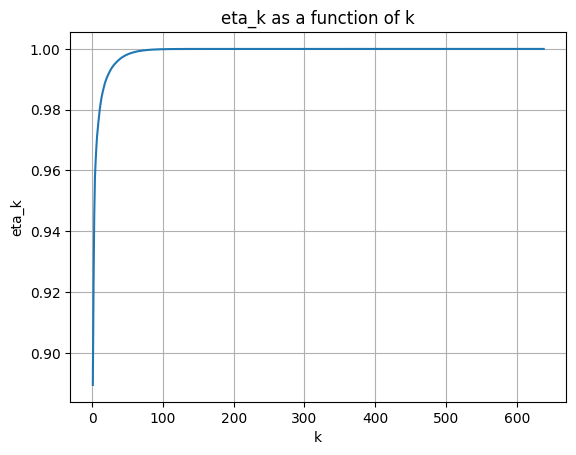

In [9]:
import matplotlib.pyplot as plt

U, S, V = np.linalg.svd(A)
fnorm_A = np.linalg.norm(A, ord='fro')

eta_vals = []

for k in range(1, min(A.shape)+1):
    Ak = np.dot(U[:, :k], np.dot(np.diag(S[:k]), V[:k, :]))
    fnorm_Ak = np.linalg.norm(Ak, ord='fro')
    eta_k = (fnorm_Ak**2) / (fnorm_A**2)
    eta_vals.append(eta_k)

# Plot the ratio eta_k from 1 to 266
plt.plot(range(1, min(A.shape)+1), eta_vals)
plt.xlabel('k')
plt.ylabel('eta_k')
plt.title('eta_k as a function of k')
plt.grid(True)
plt.show()

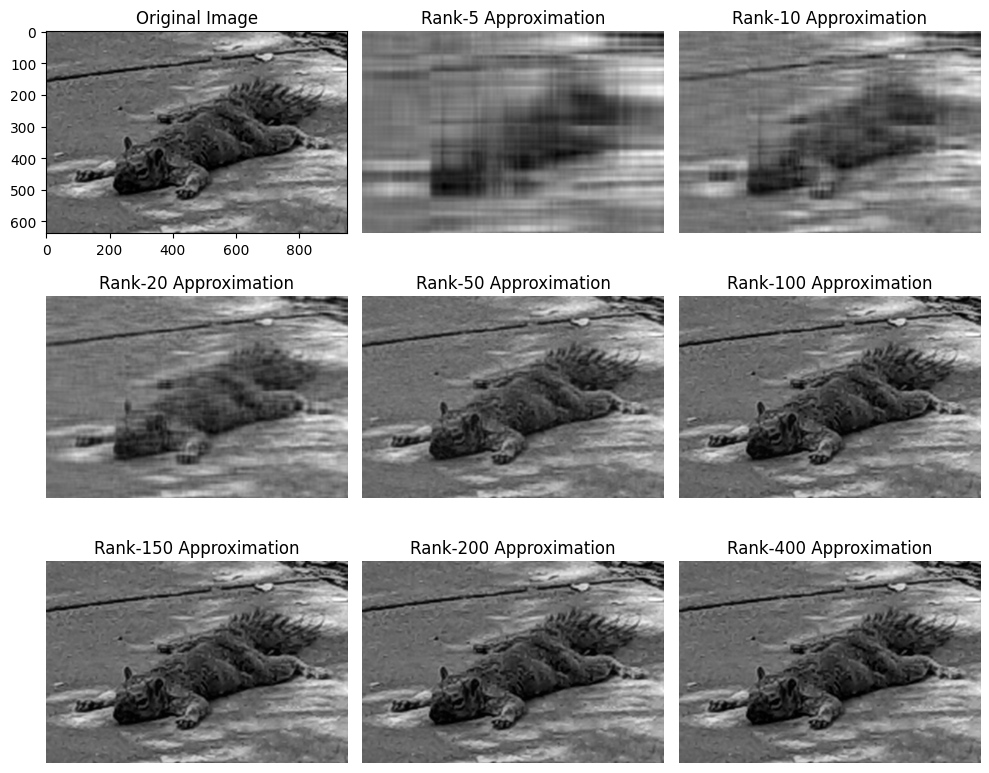

In [11]:
ranks = [5, 10, 20, 50, 100, 150, 200, 400]

# Plot original image
plt.figure(figsize=(10, 8))
plt.subplot(3, 3, 1)
plt.imshow(A, cmap='gray')
plt.title('Original Image')

# Plot rank-k approximations
for i, k in enumerate(ranks):
    # Reconstruct the image using k singular values
    Ak = np.dot(U[:, :k], np.dot(np.diag(S[:k]), V[:k, :]))
    plt.subplot(3, 3, i+2)
    plt.imshow(Ak, cmap='gray')
    plt.title(f'Rank-{k} Approximation')
    plt.axis('off')

plt.tight_layout()
plt.show()


In [3]:
import numpy as np
A = np.array([[-2, 11],
             [-10, 5]])

# Compute the SVD of matrix A
U, S, VT = np.linalg.svd(A)
V = VT.T

# Print the results
print("Left Singular Vectors (U):")
print(U)
print("\nSingular Values (S):")
print(S)
print("\nRight Singular Vectors (V):")
print(V)


Left Singular Vectors (U):
[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]

Singular Values (S):
[14.14213562  7.07106781]

Right Singular Vectors (V):
[[ 0.6 -0.8]
 [-0.8 -0.6]]
